In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from pandas.api.types import CategoricalDtype

from warnings import filterwarnings as fw
fw("ignore")

## Reading CSV file

In [309]:
data = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [310]:
df = data.copy()
t_df = test.copy()

In [311]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [312]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [314]:
type(df)

pandas.core.frame.DataFrame

## Content Of Preprocessing

1. Defined isthere_PId function
2. LabelEncoder
3. Defined NameSurTitle function
4. Defined Freq_Enc function
5. Defined RemoveOrFill function -**Failed**-
6. Manual RemoveOrFilled
7. Defined Hierarchy between Pclass values
8. MinMaxScaler

## Content of Machine Learning 

1. Defined **SVC**,**MLP**,**DT** Alghoritms
2. Trained with df DataFrame, a copy of the train dataset
3. Results

### Defining isthere_PId function

In [315]:
df = df.drop("PassengerId",axis=1)

def isthere_PId(data):
  if type(data) == pd.core.frame.DataFrame:
    for i in data.columns:
      if i == "PassengerId":
        data.drop(i,axis=1,inplace=True)
  else: 
    raise Exception("Parameter should be DataFrame")
  return data

### LabelEncoder

In [316]:
LE = LabelEncoder()
df["Sex_LE"] = LE.fit_transform(df["Sex"])

In [317]:
df

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Sex_LE  
0         1  
1         0  
2         0  
3         0  
4         1  
..      ...  
886       1  
887       0  
888       0  
889       1  
890       1  

[891 rows x 12 columns]

### Defining NameSurTitle function

In [318]:
def NameSurTitle(data):
  name = []
  surname = []
  real_name = []
  title = []

  if type(data) == pd.core.frame.DataFrame:
    for i in data.columns:
      if i == "Name":
        for i in np.arange(len(data)):
          surname.append(data["Name"].str.split(",").values[i][0])
          name.append(data["Name"].str.split(",").values[i][1])
        for i in np.arange(len(name)):
          real_name.append(name[i].split(".")[1])
          title.append(name[i].split(".")[0])
    data["name"] = real_name
    data["surname"] = surname
    data["title"] = title
    
    return data

NameSurTitle(df)

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Sex_LE                                    name    surname  title  
0         1                             Owen Harris     Braund     Mr  
1         0   John Bradley (Florence Briggs Thayer)    Cumings    Mrs  
2         0                                   Laina  Heikkinen   Miss  
3         0           Jacques Heath (Lily May Peel)   Futrelle    Mrs  
4         1                           William Henry      Allen     Mr  
..      ...                                     ...        ...    ...  
886       1                                  Juozas   Montvila    Rev  
887       0                          Margaret Edith     Graham   Miss  
888       0                Catherine Helen "Carrie"   Johnston   Miss  
889       1                             Karl Howell       Behr     Mr  
890       1                                 Patrick     Dooley     Mr  

[891 rows x 15 columns]

In [319]:
df

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Sex_LE                                    name    surname  title  
0         1                             Owen Harris     Braund     Mr  
1         0   John Bradley (Florence Briggs Thayer)    Cumings    Mrs  
2         0                                   Laina  Heikkinen   Miss  
3         0           Jacques Heath (Lily May Peel)   Futrelle    Mrs  
4         1                           William Henry      Allen     Mr  
..      ...                                     ...        ...    ...  
886       1                                  Juozas   Montvila    Rev  
887       0                          Margaret Edith     Graham   Miss  
888       0                Catherine Helen "Carrie"   Johnston   Miss  
889       1                             Karl Howell       Behr     Mr  
890       1                                 Patrick     Dooley     Mr  

[891 rows x 15 columns]

### Defining Freq_Enc function

In [320]:
def Freq_Enc(data):
  if type(data) == pd.core.frame.DataFrame:
    for i in data.columns:
      try:
        if i == "Embarked":
            freq_enc = data.groupby("Embarked").size()/len(data)
            data["Embarked_enc"] = data["Embarked"].apply(lambda x: freq_enc[x])
        elif i == "title":
          freq_title = data.groupby("title").size()/len(data)
          data["title_enc"] = data["title"].apply(lambda x: freq_title[x])
      except KeyError:
        raise KeyError("remove or fill nan values available columns(Embarked,title)")

  return data


In [321]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Sex_LE        0
name          0
surname       0
title         0
dtype: int64

### Defining RemoveOrFill function -**Failed**-

In [322]:
"""
def RemovOrFill(data):
  imputer = KNNImputer()

  if type(data) == pd.core.frame.DataFrame:
    for i in data.columns:

      if data[i].isnull().sum() < 5:
        data[i]=data[i].dropna(axis=0)

      elif data[i].isnull().sum() >= 5 and data[i].isnull().sum() < 500:
        x = data[["Age","Pclass","SibSp","Parch","Fare"]]
        data[["Age","Pclass","SibSp","Parch","Fare"]] = imputer.fit_transform(x)

      elif data[i].isnull().sum() > 500:
        data = data.drop(i,axis=1)

    return data
"""

'\ndef RemovOrFill(data):\n  imputer = KNNImputer()\n\n  if type(data) == pd.core.frame.DataFrame:\n    for i in data.columns:\n\n      if data[i].isnull().sum() < 5:\n        data[i]=data[i].dropna(axis=0)\n\n      elif data[i].isnull().sum() >= 5 and data[i].isnull().sum() < 500:\n        x = data[["Age","Pclass","SibSp","Parch","Fare"]]\n        data[["Age","Pclass","SibSp","Parch","Fare"]] = imputer.fit_transform(x)\n\n      elif data[i].isnull().sum() > 500:\n        data = data.drop(i,axis=1)\n\n    return data\n'

In [323]:
#RemovOrFill(df)

### Manual RemoveOrFilling

In [324]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Sex_LE        0
name          0
surname       0
title         0
dtype: int64

In [325]:
df = df.loc[df.Embarked.dropna(axis=0).index]

In [326]:
imputer = KNNImputer()
x = df[["Age","Pclass","SibSp","Parch","Fare"]]
df[["Age","Pclass","SibSp","Parch","Fare"]] = imputer.fit_transform(x)

In [327]:
df = df.drop("Cabin",axis=1)

In [328]:
df.select_dtypes(include=["int","float"]).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_LE'], dtype='object')

In [329]:
x = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_LE']]
y = df["Survived"]

### Defined Hierarchy between Pclass values

In [330]:
def HierPclass(data):
  for i in data.columns:
    if i == "Pclass":
      data["Pclass"].astype(CategoricalDtype(ordered=True))
      data["Pclass"] = data["Pclass"].astype(CategoricalDtype(categories=[3.0,2.0,1.0],ordered=True))

In [331]:
HierPclass(df)

#### Visualized Data

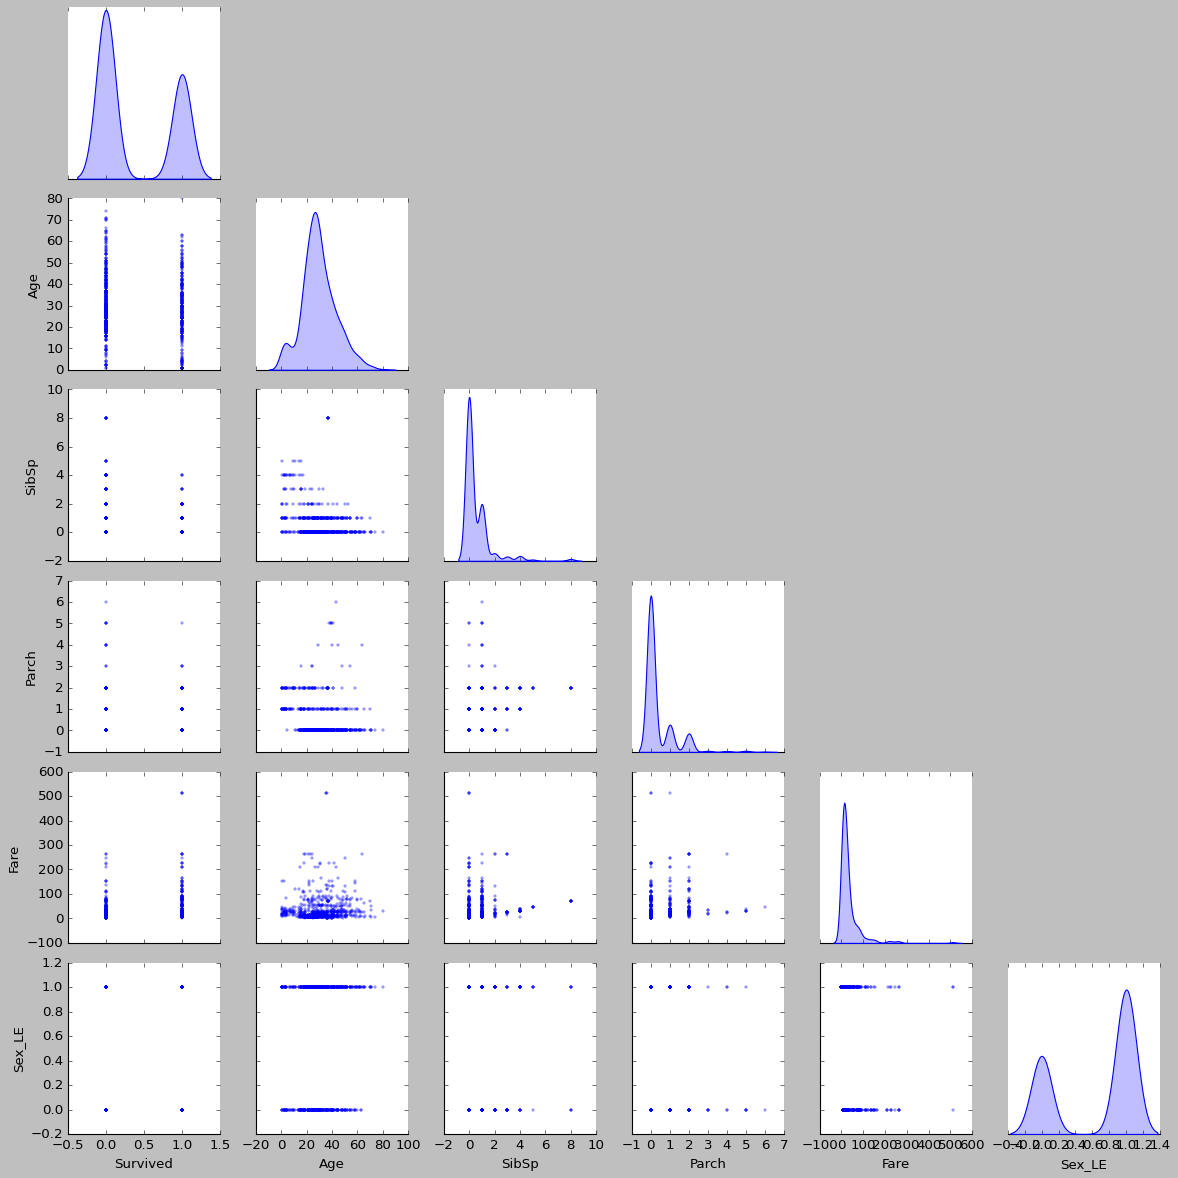

In [339]:
plt.style.use('classic')

sns.pairplot(df.select_dtypes(include=[np.int,np.float]),
             corner=True,diag_kind="kde",markers="+");

### MinMaxScaler

In [332]:
mms = MinMaxScaler()
x = mms.fit_transform(x)

## Machine Learning Alghorithms

In [333]:
svc = SVC()
mlp = MLPClassifier()
dt = DecisionTreeClassifier()

In [334]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       106
           1       0.87      0.64      0.74        72

    accuracy                           0.81       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

-----------------------------------------------
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       106
           1       0.87      0.64      0.74        72

    accuracy                           0.81       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

------------------

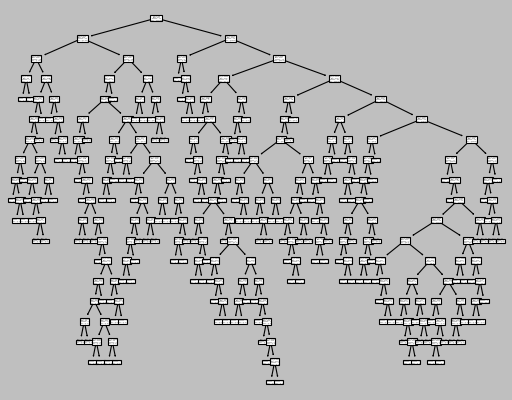

In [335]:
for i in [svc,mlp,dt]:
  model = i.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(classification_report(y_test,pred))
  print("-----------------------------------------------")
  print(model.get_params())
  if i == dt:
    print(tree.export_text(dt))
    print("-----------------------------------------------")
    plt.style.use("classic")
    tree.plot_tree(dt);